In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import pandas as pd

In [14]:
# The input
datain = np.loadtxt('06a_input.txt',comments=None,delimiter=', ')
datain = datain.astype(int)

In [130]:
datain[:5]

array([[ 45, 315],
       [258, 261],
       [336, 208],
       [160, 322],
       [347, 151]])

In [285]:
# Test input
testin = np.array([[1,1],[1,6],[8,3],[3,4],[5,5],[8,9]]).astype(int)

In [325]:
np.max(datain)
#np.max(testin)

356

In [326]:
# populate the original array
map0 = np.zeros((360,360))

for i,coord in enumerate(datain):
    map0[coord[0],coord[1]] = i+1
    #print(coord[1])


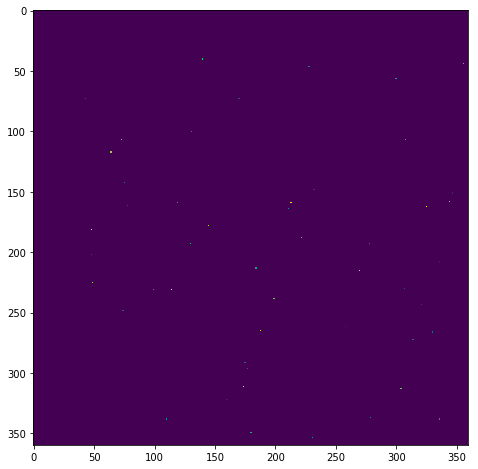

In [327]:
plt.figure(figsize=(8,8))
plt.imshow(map0.T)

In [328]:
def mhd(inarray,loi):
    outarray = np.zeros_like(inarray)
    for i in range(outarray.shape[0]):
        for j in range(outarray.shape[1]):
            outarray[i,j] = abs(loi[0]-i) + abs(loi[1]-j)
    return outarray


In [331]:
# create a 3D array. [x,y,layer], where layer is the mhd from point index#

mhd3 = np.zeros((map0.shape[0],map0.shape[1],datain.shape[0]))

for layer in range(mhd3.shape[2]):
    mhd3[:,:,layer] = mhd(map0,datain[layer])
    
    
# at each location, find the index of the closest point

# find the minimum dist
mins = np.amin(mhd3,axis=2)
# find the index for that min
idxmins = np.empty_like(map0)
for i in range(map0.shape[0]):
        for j in range(map0.shape[1]):
            if len(np.where(mhd3[i,j,:] == mins[i,j])[0]) > 1:
                idxmins[i,j] = np.nan
            else:
                idxmins[i,j] = np.where(mhd3[i,j,:] == mins[i,j])[0]




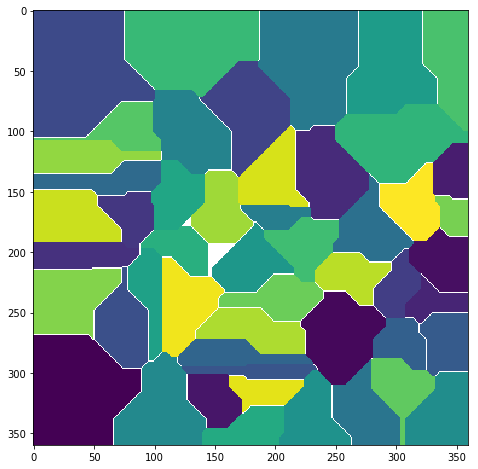

In [332]:
plt.figure(figsize=(8,8))
plt.imshow(idxmins.T)

In [345]:
np.amax(idxmins[np.where(idxmins < 100)])

49.0

In [346]:
# find indicies of arrays that reach the border
idxinfinites = np.unique(np.array([idxmins[0],idxmins[-1],idxmins[:,0],idxmins[:,-1]])).astype(int)

idxinfinites = idxinfinites[idxinfinites > -1]

idxinfinites



array([ 0,  2,  4,  5,  7, 11, 14, 17, 19, 20, 23, 24, 25, 27, 30, 32, 33,
       35, 36, 37, 39, 40, 41, 45])

In [348]:
idxareas = np.zeros_like(datain)

for i in range(idxareas.shape[0]):
    idxareas[i] = [i,np.count_nonzero(idxmins == i)]
    
# Ignore those infinite areas:
noninf = np.delete(idxareas,idxinfinites,axis=0)
np.amax(noninf)

3894